# Descriptive Statistics, Generator Practice

GISS Temp Data:

* [home](https://data.giss.nasa.gov/gistemp/)
* [as text file](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt)
* [as csv](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv)
* [faq (why anomaly rather than absolute temp)](https://data.giss.nasa.gov/gistemp/faq/)
* [absolute varies in short distance](https://data.giss.nasa.gov/gistemp/faq/abs_temp.html)
* [example plot](https://data.giss.nasa.gov/gistemp/faq/)

1. discuss line graphs
2. discuss scatter plots
3. best fit line





(0, 12)

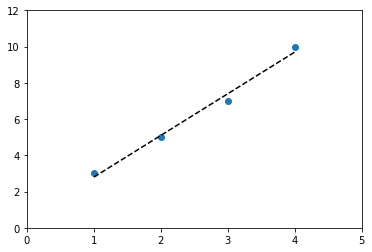

In [4]:
# https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.scatter(x, y)
plt.plot(x, poly1d_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

## Example Generator

Calling the following function does not require entire contents of file (or even entire column) to be read into memory; instead, calorie value is read as needed.

In [14]:
# create generator function to read in 
# calorie column
def get_calories():
    with open('starbucks_drinkMenu_expanded.csv', 'r') as f:
        next(f)
        for line in f:
            line_parts = line.split(',')
            yield int(line_parts[3])


## Descriptive Statistics

### Max, Min, and Len

It may be useful to describe a data set by:

* the number of data points
* the highest and lowest value

There are built in functions in Python to do this, like `max`, `min`, and `len`

In [15]:
# max and min can actually take a generator 
max(get_calories())

510

In [8]:
min(get_calories())

0

A generator is not actually a _collection_ of elements, so you can't use `len` on it. Instead, you'll have to turn your generator into a collection...

In [9]:
# if we want to work with all values from our generator, we can convert to a list 
# (that means all values are in memory, tho)
calories = list(get_calories())

In [16]:
# now it's possible to get the length of our data set
len(calories)

242

In [18]:
# because it's a list we can view the first 10 values with slicing
calories[:10]

[3, 4, 5, 5, 70, 100, 70, 100, 150, 110]

In [19]:
# ...and the last 10 values
calories[-10:]

[230, 260, 240, 310, 350, 320, 170, 200, 180, 240]

### Central Tendency

Two methods of determining where our data set is centered are:

1. mean
2. median

In [5]:
mean = lambda li: sum(li) / len(li)
mean([1, 2, 3, 4, 5])

3.0

In [9]:
def median(li):
    li.sort()
    i = len(li) // 2
    if len(li) % 2 == 1:
        ret =  li[i]
    else:
        ret = mean(li[i - 1:i + 1])
    return ret

print(median([1, 2, 3, 4, 5]))
print(median([1, 2, 3, 5, 6, 7]))

3
4.0


In [12]:
from collections import Counter
def mode(li):
    counts = Counter(li)
    return counts.most_common(1)[0][0]
    
mode([1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 5, 5, 6, 7])

3

In [11]:
# calculating the mean
sum(calories) / len(calories)

193.87190082644628

In [22]:
# if we need the mean, we'll have to sort first
sorted_calories = sorted(calories)

In [23]:
# calculating the median
# if there is an even number of elements, we'll have to take average of middle two

def median(d):
    middle_index = len(d) // 2
    if len(d) % 2 == 0:
        return (d[middle_index] + d[middle_index + 1]) / 2
    else: 
        return d[middle_index]


In [24]:
median(sorted_calories)

190.0

In [32]:
# note that outliers may not affect the median, whereas they can throw off the mean!

copy_sorted_calories = sorted_calories[:]

# change the last value...
copy_sorted_calories[-1] = 200000

In [33]:
sum(copy_sorted_calories) / len(copy_sorted_calories)

1018.2107438016529

In [34]:
median(copy_sorted_calories)

190.0

In [91]:
# otoh adding / removing several values that aren't outliers may make the median jump, 
# whereas the mean may only change slightly

In [92]:
copy_sorted_calories = [150] * 20 + sorted_calories[:]

In [93]:
sum(copy_sorted_calories) / len(copy_sorted_calories)

190.5229007633588

In [94]:
median(copy_sorted_calories)

180.0

In [95]:
# note that there are so many values that are 190 above that it's tough to change
# that without adding several values like we did abovekkkk
sorted_calories.count(190)

11